Perceptron-Simple

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.manifold import Isomap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None)

In [4]:
df = df.to_numpy()

#Preprocesamiento de datos Mnist

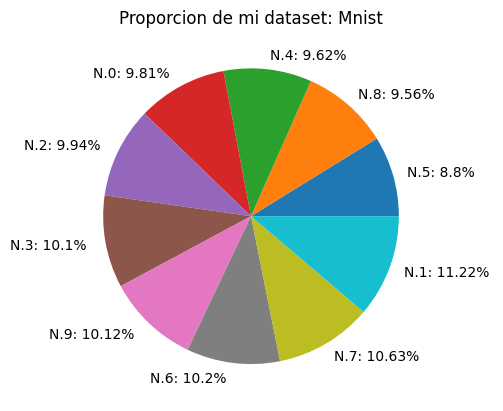

In [5]:
X = df[:,1:]
y = df[:,0]

clases, cantidades = np.unique(y,return_counts=True)

cantidades_ind = np.argsort(cantidades)
total = sum(cantidades)
#print(clases[cantidades_ind])
lab_tex = [f'N.{clases[cantidades_ind[ind]]}: {round(var*100/total,2)}% ' for ind, var in enumerate(cantidades[cantidades_ind])]
plt.pie(cantidades[cantidades_ind], labels=lab_tex)
plt.title('Proporcion de mi dataset: Mnist')
plt.show()

#Visualizacion de un ejemplo del data set

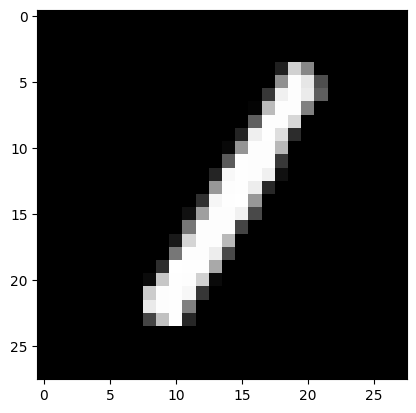

In [6]:
plt.imshow(X[y==1,:][2].reshape((28,28)), cmap='gray')
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=2023)

In [21]:
isomap_model = Isomap(n_components=2)
X_tranformed = isomap_model.fit(X_train[:100])
X_isomap = isomap_model.transform(X)

In [22]:
scaler = MinMaxScaler(feature_range=(-1,1))
X_scaler = scaler.fit_transform(X_isomap)

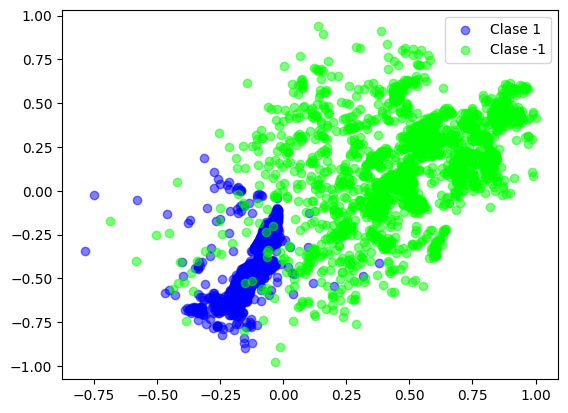

In [25]:
s = X_scaler[y==1,0]
d = X_scaler[y==1,1]
f = X_scaler[y==0,0]
g = X_scaler[y==0,1]
plt.scatter(s,d, label= 'Clase 1',color=(0,0,1,.5))
plt.scatter(f,g, label= 'Clase -1',color=(0,1,0,.5))
plt.legend()
plt.show()

Generamos el conjunto de entrenamineto

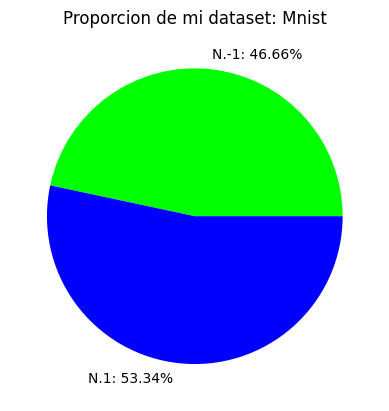

In [40]:
G1 = np.array(list(zip(s,d)))
G2 = np.array(list(zip(f,g)))
# Generar el conjunto de entremient.
X = [vec for vec in G1]
y = [1 for aux in range(G1.shape[0])]
X += [vec for vec in G2]
y += [-1 for aux in range(G2.shape[0])]
#Separar datos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=2023)

#Cuantas clases y valores de las clases tenemos
clases, cantidades = np.unique(y,return_counts=True)

cantidades_ind = np.argsort(cantidades)
total = sum(cantidades)
#print(clases[cantidades_ind])
lab_tex = [f'N.{clases[cantidades_ind[ind]]}: {round(var*100/total,2)}% ' for ind, var in enumerate(cantidades[cantidades_ind])]
plt.pie(cantidades[cantidades_ind], labels=lab_tex,colors=[(0,1,0),(0,0,1)])
plt.title('Proporcion de mi dataset: Mnist')
plt.show()

Funcion de activación. (Heaviside)

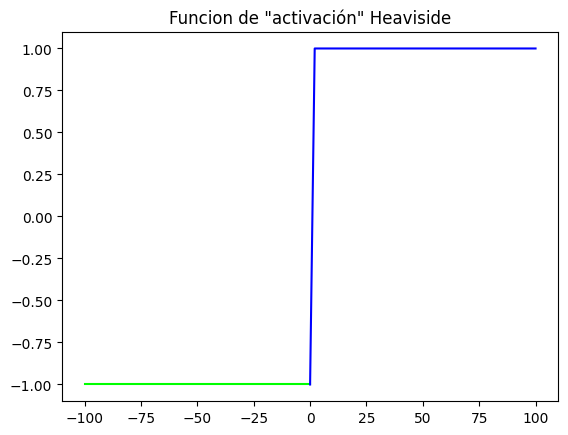

In [38]:
fh = lambda z: 1 if z>0 else -1
lin = np.linspace(-100,0,50)
lin_dos = np.linspace(0,100,50)
plt.plot(lin,[fh(var) for var in lin ],color=(0,1,0))
plt.plot(lin_dos,[fh(var) for var in lin_dos ],color=(0,0,1))
plt.title('Funcion de "activación" Heaviside')
plt.show()

In [44]:
#Funcion de activacion y correción de los pesos del Perceptron simple.
def act_w(x,y,w,n=1):
  #n es la taza de aprendizaje
  x_aux = np.append([1],x)
  z = x_aux @ w
  y_p = fh(z)
  if y_p == y:
    print('Bien hecho')
    return w
  else:
    print(f'Corriguiendo y_p:{y_p} -> y_real: {y}')
    w_aux = [0] * w.shape[0]
    delta = y - y_p
    for ind,val in enumerate(w):
      error = n*delta*x_aux[ind]
      w_aux[ind] = val + error
    return w_aux



In [51]:
#Incializamos los pesos
W = np.array([0,0,0])

#act_w(X_train[0],y_train[0],W,1)

#Entrnamiento de la red

In [52]:
for epocas in range(10):
  for ind in range(0,len(X_train)):
    w_nuevo = act_w(X_train[ind], y_train[ind], W, n= 2e-10)
    #print(w_nuevo, X_train[ind], Y_train[ind], W)
    W = np.array(w_nuevo)
print(w_nuevo, X_train[ind], y_train[ind], W)

Se han truncado las últimas 5000 líneas del flujo de salida.
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Corriguiendo y_p:1 -> y_real: -1
Bien hecho
Corriguiendo y_p:-1 -> y_real: 1
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Corriguiendo y_p:1 -> y_real: -1
Corriguiendo y_p:-1 -> y_real: 1
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien

#Vizualizamos el resultado

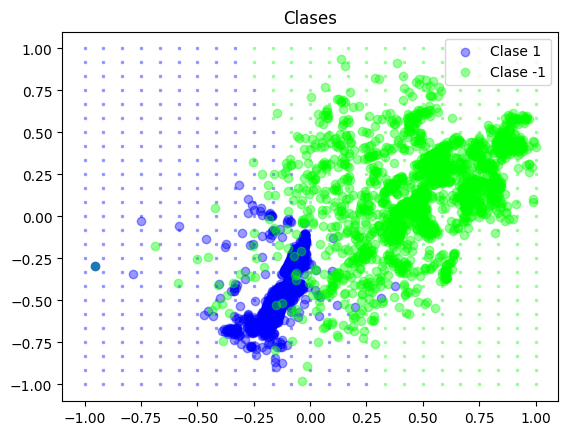

In [53]:
x_var = np.linspace(-1,1,25)
y_var = np.linspace(-1,1,25)


for ind in x_var:
  for jnd in y_var:
    if fh(np.append([1],[ind,jnd])@W) == 1:
      color = (0,0,1,.3)
    elif fh(np.append([1],[ind,jnd])@W) == -1:
      color = (0,1,0,.3)
    plt.scatter([ind],[jnd],color=color,marker='s',s=3)


plt.scatter(s,d,label='Clase 1',color=(0,0,1,.4))
plt.scatter(f,g,label='Clase -1',color=(0,1,0,.4))

pesos_normal = np.linalg.norm(W[1:])
plt.scatter([W[1]/pesos_normal],[W[2]/pesos_normal])
plt.title('Clases')
plt.legend()
#plt.axis('equal')
plt.show()

Generamos las graficas paso a paso y visualizamos las correciones de los pesos

Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Corriguien

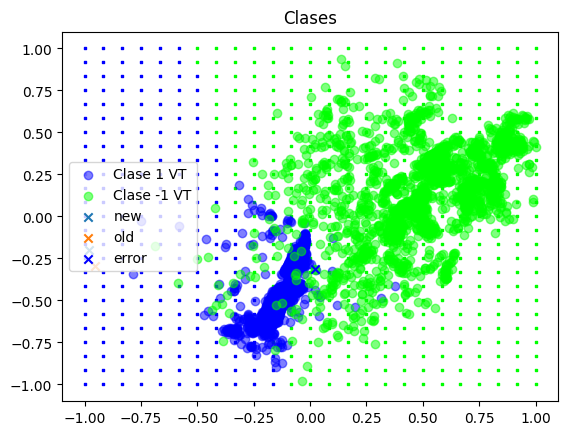

Bien hecho
Bien hecho
Bien hecho
Corriguiendo y_p:-1 -> y_real: 1
[0.0, -1.2632214336000032e-09, -3.6199197184452446e-10] w Actulizada vs W_old>> [-4.00000000e-10 -1.23262406e-09 -2.52854411e-10]


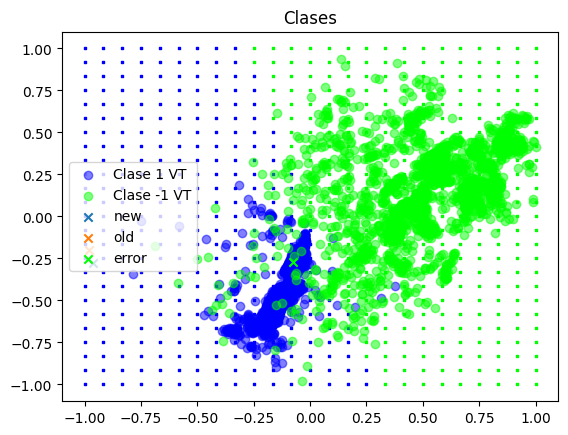

Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Corriguiendo y_p:1 -> y_real: -1
[-4e-10, -1.2336119949346791e-09, -4.0132298553631933e-10] w Actulizada vs W_old>> [ 0.00000000e+00 -1.26322143e-09 -3.61991972e-10]


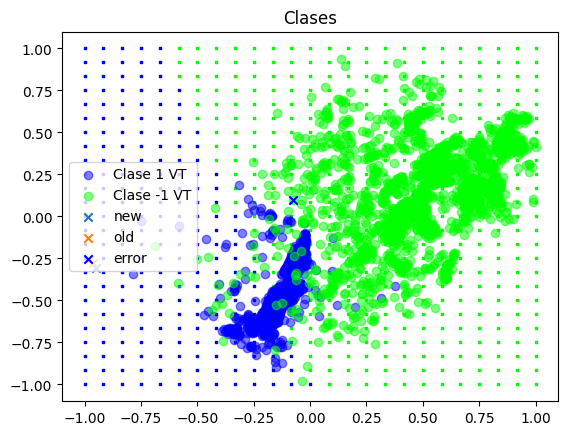

Bien hecho
Bien hecho
Corriguiendo y_p:-1 -> y_real: 1
[0.0, -1.2452711347376373e-09, -4.775936240458289e-10] w Actulizada vs W_old>> [-4.00000000e-10 -1.23361199e-09 -4.01322986e-10]


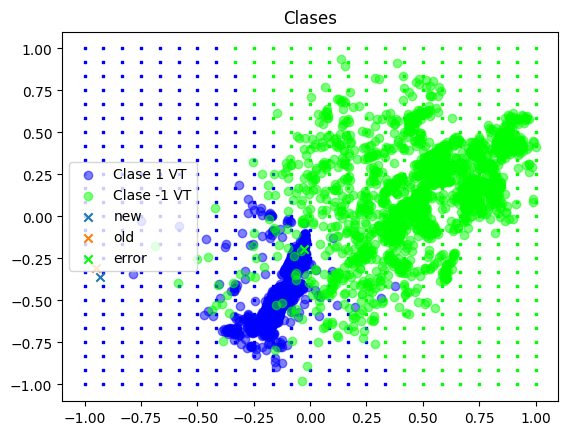

Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho
Bien hecho

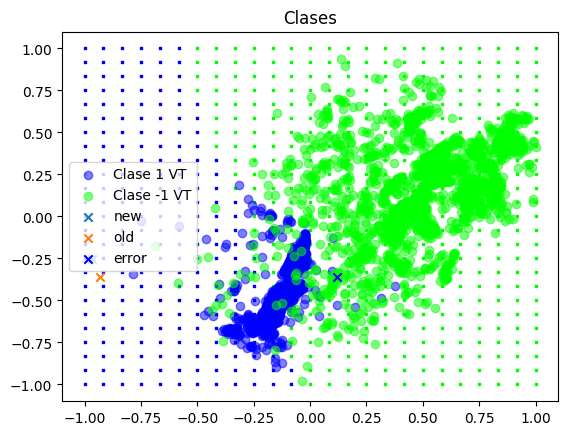

Bien hecho
Corriguiendo y_p:-1 -> y_real: 1
[0.0, -1.3277888721416283e-09, -5.138475605099598e-10] w Actulizada vs W_old>> [-4.00000000e-10 -1.29225628e-09 -3.34511822e-10]


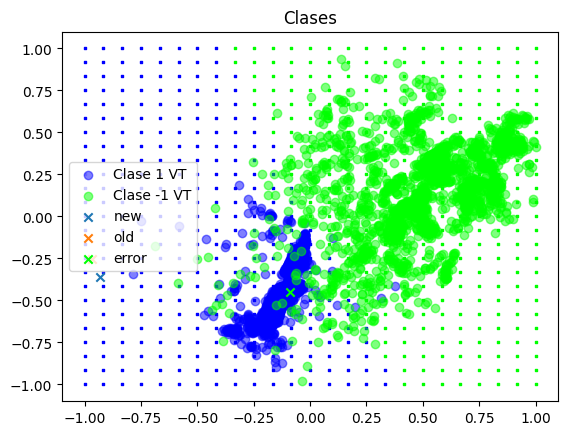

Bien hecho


In [54]:
#W = np.array([0,0,0])
c_actualizador = 0
lim_iter = 5
for x_ind in range(0,len(X_train)):
  w_nuevo = act_w(X_train[x_ind], y_train[x_ind], W, 2e-10)
  if c_actualizador > lim_iter:
    break

  if not np.array_equal(w_nuevo,W):
    c_actualizador += 1
    print(w_nuevo,'w Actulizada vs W_old>>',W)
    W_old = W.copy()
    W = np.array(w_nuevo)




    for ind in x_var:
      for jnd in y_var:
        if fh(np.append([1],[ind,jnd])@W) == 1:
          color = (0,0,1,1)
        elif fh(np.append([1],[ind,jnd])@W) == -1:
          color = (0,1,0,1)
        # graficamos los cuadrados
        plt.scatter([ind],[jnd],color=color,marker='s',s=3)




    plt.scatter(s,d,label='Clase 1 VT',color=(0,0,1,.5))
    plt.scatter(f,g,label='Clase -1 VT',color=(0,1,0,.5))

    pesos_normal = np.linalg.norm(W[1:])
    plt.scatter([W[1]/pesos_normal],[W[2]/pesos_normal],marker='x',label='new')
    pesos_normal = np.linalg.norm(W_old[1:])
    plt.scatter([W_old[1]/pesos_normal],[W_old[2]/pesos_normal],marker='x',label='old')
    if y_train[x_ind] == -1:
        color_er = (0,0,1,1)
    elif y_train[x_ind] == 1:
        color_er = (0,1,0,1)
    plt.scatter([X_train[x_ind][0]],[X_train[x_ind][1]], marker='x',label='error',color= color_er)
    plt.title('Clases')

    plt.legend()
    plt.show()